<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

with open(NOME_ARQUIVO_FONTE, mode='r', encoding='utf8') as arquivo: #abre o arquivo XML no modo leitura
  conteudo = arquivo.read() #lê o conteúdo do arquivo e armazena na variável conteudo
  fonte = BeautifulSoup(conteudo, 'lxml-xml') # Parsear o XML com lxml / especifica que o arquivo é XML, o que desativa a advertência e faz o BeautifulSoup tratar o conteúdo como XML

In [ ]:
# visualize os resultados

print(fonte.prettify()) #vai formatar o XML de forma mais legível e organizada, imprimindo o resultado no console

In [ ]:
# manipule os dados

estados = fonte.find_all('ESTADO') #Encontrar todos os elementos estado

estados_lista = [] #Lista para armazenar os estados

for estado in estados: #Extrair e exibir as informações de cada estado
  ID_ESTADO = estado.find('ID').text if estado.find('ID') else 'Desconhecido'
  NOME = estado.find('NOME').text if estado.find('NOME') else 'Desconhecido'
  SIGLA = estado.find('SIGLA').text if estado.find('SIGLA') else 'N/A'
  REGIAO = estado.find('REGIAO').text if estado.find('REGIAO') else 'N/A'
  ID_CAPITAL = estado.find('IDCAPITAL').text if estado.find('IDCAPITAL') else 'N/A'

  estados_lista.append({'ID': ID_ESTADO, 'NOME': NOME, 'SIGLA': SIGLA, 'REGIAO': REGIAO, 'IDCAPITAL': ID_CAPITAL}) #Armazenar como dicionário

print(estados_lista) #Exibir a lista de estados

[{'ID': '1', 'NOME': 'ACRE', 'SIGLA': 'AC', 'REGIAO': 'NORTE', 'IDCAPITAL': '16'}, {'ID': '2', 'NOME': 'ALAGOAS', 'SIGLA': 'AL', 'REGIAO': 'NORDESTE', 'IDCAPITAL': '68'}, {'ID': '3', 'NOME': 'AMAPA', 'SIGLA': 'AP', 'REGIAO': 'NORTE', 'IDCAPITAL': '131'}, {'ID': '4', 'NOME': 'AMAZONAS', 'SIGLA': 'AM', 'REGIAO': 'NORTE', 'IDCAPITAL': '178'}, {'ID': '5', 'NOME': 'BAHIA', 'SIGLA': 'BA', 'REGIAO': 'NORDESTE', 'IDCAPITAL': '536'}, {'ID': '6', 'NOME': 'CEARA', 'SIGLA': 'CE', 'REGIAO': 'NORDESTE', 'IDCAPITAL': '676'}, {'ID': '7', 'NOME': 'DISTRITO FEDERAL', 'SIGLA': 'DF', 'REGIAO': 'CENTRO-OESTE', 'IDCAPITAL': '916'}, {'ID': '8', 'NOME': 'ESPIRITO SANTO', 'SIGLA': 'ES', 'REGIAO': 'SUDESTE', 'IDCAPITAL': '879'}, {'ID': '9', 'NOME': 'GOIAS', 'SIGLA': 'GO', 'REGIAO': 'CENTRO-OESTE', 'IDCAPITAL': '973'}, {'ID': '10', 'NOME': 'MARANHAO', 'SIGLA': 'MA', 'REGIAO': 'NORDESTE', 'IDCAPITAL': '1309'}, {'ID': '11', 'NOME': 'MATO GROSSO', 'SIGLA': 'MT', 'REGIAO': 'CENTRO-OESTE', 'IDCAPITAL': '1374'}, {'ID'

In [ ]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

import csv

NOME_ARQUIVO_SAIDA = 'estados-limpo.csv' #Caminho do arquivo de saída

cabecalho = ['ID', 'NOME', 'SIGLA', 'REGIAO', 'IDCAPITAL'] #Cabeçalhos para o CSV

with open(NOME_ARQUIVO_SAIDA, mode='w', encoding='utf8', newline='') as arquivo_csv: #Abrir o arquivo no modo escrita
    writer = csv.DictWriter(arquivo_csv, fieldnames=cabecalho, delimiter=';') #Usamos DictWriter para escrever os dados no formato de dicionário, onde as chaves correspondem aos cabeçalhos e os valores aos dados de cada estado.
    writer.writeheader() #Escrever o cabeçalho

    for estado in estados_lista: #Escrever os dados dos estados
        writer.writerow(estado) #Escreve uma linha do dicionário estado no arquivo CSV

print(f'Dados salvos em {NOME_ARQUIVO_SAIDA}')

Dados salvos em estados-limpo.csv


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [ ]:
# ler o arquivo cidades-bruto.csv

import pandas as pd #A função read_csv() do pandas já cuida de ler o arquivo CSV e converter as informações em um DataFrame por isso Não é necessário usar o formato with open e arquivo.read(): Quando você usa o pandas para ler um arquivo, ele já lida com a leitura interna.

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE, sep=',', usecols=['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']) #usecols: garante que somente as colunas que você deseja sejam carregadas

In [ ]:
# visualize os resultados

print(fonte)

                     UF               nome           PIB  Pop_est_2009  \
0                 BAHIA           Tremedal  5.788399e+04         18433   
1     RIO GRANDE DO SUL             Turuçu  4.572388e+04          4000   
2        ESPIRITO SANTO            Vitória  1.978263e+07        320156   
3          MINAS GERAIS          Jacutinga  2.478160e+05         21424   
4                 PIAUÍ            Nazária  2.095138e+04          7895   
...                 ...                ...           ...           ...   
1715              BAHIA              Aporá  5.578780e+04         18738   
1716           MARANHÃO     Gonçalves Dias  5.020111e+04         16911   
1717          SÃO PAULO  Alfredo Marcondes  3.810474e+04          4055   
1718               PARÁ             Anajás  6.253456e+04         27386   
1719       MINAS GERAIS      Divisa Alegre  4.266709e+04          6235   

      PIB_percapita  
0       3140.239990  
1      11430.969727  
2      61790.589844  
3      11567.209961  
4

In [ ]:
# manipule os dados

print(fonte.head()) #05 primeiras linhas para saber dcomo ficaria

                  UF       nome           PIB  Pop_est_2009  PIB_percapita
0              BAHIA   Tremedal  5.788399e+04         18433    3140.239990
1  RIO GRANDE DO SUL     Turuçu  4.572388e+04          4000   11430.969727
2     ESPIRITO SANTO    Vitória  1.978263e+07        320156   61790.589844
3       MINAS GERAIS  Jacutinga  2.478160e+05         21424   11567.209961
4              PIAUÍ    Nazária  2.095138e+04          7895    2653.750000


In [ ]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv' #Nome do arquivo de destino

fonte.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False) #Escrever o conteúdo extraído no arquivo de destino com separador ';'

print(f'Dados salvos em {NOME_ARQUIVO_DESTINO}')

Dados salvos em cidades-limpo.csv


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
# solução do exercício 1.3

import pandas as pd

#pd.read_csv - lê os arquivos CSV
estados = pd.read_csv('estados-limpo.csv', sep=';')
cidades = pd.read_csv('cidades-limpo.csv', sep=';')

#incio dos ajuste dos nomes de estados
mapeamento = {
    'SÃO PAULO': 'SAO PAULO',
    'RONDÔNIA': 'RONDONIA',
    'AMAPÁ': 'AMAPA',
    'PIAUÍ': 'PIAUI',
    'GOIÁS': 'GOIAS',
    'PARÁ': 'PARA',
    'PARAÍBA': 'PARAIBA',
    'CEARÁ': 'CEARA',
    'MARANHÃO': 'MARANHAO',
    'PARANÁ': 'PARANA'
}
cidades['UF'] = cidades['UF'].replace(mapeamento)

#fim dos ajustes

df_combinado = pd.merge(left=estados, right=cidades, left_on='NOME', right_on='UF', how='outer')#Realiza a junção dos dois DataFrames. O parâmetro on='UF' indica que a coluna UF será usada como chave para combinar os dados. O parâmetro how='outer' garante que todos os registros de ambos os DataFrames sejam mantidos, sem perda de dados (mesmo que um arquivo não tenha dados para uma determinada UF).

df_combinado.to_csv('brasil.csv', sep=';', index=False) #Salva o DataFrame combinado no arquivo brasil.csv com separador ; e sem o índice.

print(f'Dados salvos em brasil.csv')

Dados salvos em brasil.csv


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
# solução do exercício 2.1

import pandas as pd

brasil_df = pd.read_csv('brasil.csv', sep=';') #Carregar o arquivo 'brasil.csv' no DataFrame

print(brasil_df.head()) #primeiras linhas do DataFrame para garantir que os dados foram carregados corretamente

    ID  NOME SIGLA REGIAO  IDCAPITAL    UF                  nome  \
0  1.0  ACRE    AC  NORTE       16.0  ACRE  Marechal Thaumaturgo   
1  1.0  ACRE    AC  NORTE       16.0  ACRE      Senador Guiomard   
2  1.0  ACRE    AC  NORTE       16.0  ACRE          Assis Brasil   
3  1.0  ACRE    AC  NORTE       16.0  ACRE        Epitaciolândia   
4  1.0  ACRE    AC  NORTE       16.0  ACRE         Manoel Urbano   

             PIB  Pop_est_2009  PIB_percapita  
0  109181.867188       14275.0    7648.470215  
1  217153.859375       19697.0   11024.719727  
2   48347.300781        5662.0    8538.910156  
3  129641.093750       14224.0    9114.250000  
4   61478.730469        7505.0    8191.700195  


In [ ]:
print(brasil_df) #exibir completo

        ID       NOME SIGLA REGIAO  IDCAPITAL         UF  \
0      1.0       ACRE    AC  NORTE       16.0       ACRE   
1      1.0       ACRE    AC  NORTE       16.0       ACRE   
2      1.0       ACRE    AC  NORTE       16.0       ACRE   
3      1.0       ACRE    AC  NORTE       16.0       ACRE   
4      1.0       ACRE    AC  NORTE       16.0       ACRE   
...    ...        ...   ...    ...        ...        ...   
1726  26.0  TOCANTINS    TO  NORTE     4606.0  TOCANTINS   
1727  26.0  TOCANTINS    TO  NORTE     4606.0  TOCANTINS   
1728  26.0  TOCANTINS    TO  NORTE     4606.0  TOCANTINS   
1729  26.0  TOCANTINS    TO  NORTE     4606.0  TOCANTINS   
1730  26.0  TOCANTINS    TO  NORTE     4606.0  TOCANTINS   

                      nome            PIB  Pop_est_2009  PIB_percapita  
0     Marechal Thaumaturgo  109181.867188       14275.0    7648.470215  
1         Senador Guiomard  217153.859375       19697.0   11024.719727  
2             Assis Brasil   48347.300781        5662.0    8

In [ ]:
brasil_df.rename(columns={'nome': 'CIDADE'}, inplace=True) # Renomear a coluna 'nome' para 'CIDADE'

print(brasil_df.head())# Verificar se a alteração foi bem-sucedida

    ID  NOME SIGLA REGIAO  IDCAPITAL    UF                CIDADE  \
0  1.0  ACRE    AC  NORTE       16.0  ACRE  Marechal Thaumaturgo   
1  1.0  ACRE    AC  NORTE       16.0  ACRE      Senador Guiomard   
2  1.0  ACRE    AC  NORTE       16.0  ACRE          Assis Brasil   
3  1.0  ACRE    AC  NORTE       16.0  ACRE        Epitaciolândia   
4  1.0  ACRE    AC  NORTE       16.0  ACRE         Manoel Urbano   

             PIB  Pop_est_2009  PIB_percapita  
0  109181.867188       14275.0    7648.470215  
1  217153.859375       19697.0   11024.719727  
2   48347.300781        5662.0    8538.910156  
3  129641.093750       14224.0    9114.250000  
4   61478.730469        7505.0    8191.700195  


In [ ]:
brasil_df.rename(columns={'NOME': 'ESTADO'}, inplace=True)

print(brasil_df.head())

    ID ESTADO SIGLA REGIAO  IDCAPITAL    UF                CIDADE  \
0  1.0   ACRE    AC  NORTE       16.0  ACRE  Marechal Thaumaturgo   
1  1.0   ACRE    AC  NORTE       16.0  ACRE      Senador Guiomard   
2  1.0   ACRE    AC  NORTE       16.0  ACRE          Assis Brasil   
3  1.0   ACRE    AC  NORTE       16.0  ACRE        Epitaciolândia   
4  1.0   ACRE    AC  NORTE       16.0  ACRE         Manoel Urbano   

             PIB  Pop_est_2009  PIB_percapita  
0  109181.867188       14275.0    7648.470215  
1  217153.859375       19697.0   11024.719727  
2   48347.300781        5662.0    8538.910156  
3  129641.093750       14224.0    9114.250000  
4   61478.730469        7505.0    8191.700195  


In [ ]:
print(brasil_df.head())

    ID ESTADO SIGLA REGIAO  IDCAPITAL    UF                CIDADE  \
0  1.0   ACRE    AC  NORTE       16.0  ACRE  Marechal Thaumaturgo   
1  1.0   ACRE    AC  NORTE       16.0  ACRE      Senador Guiomard   
2  1.0   ACRE    AC  NORTE       16.0  ACRE          Assis Brasil   
3  1.0   ACRE    AC  NORTE       16.0  ACRE        Epitaciolândia   
4  1.0   ACRE    AC  NORTE       16.0  ACRE         Manoel Urbano   

             PIB  Pop_est_2009  PIB_percapita  
0  109181.867188       14275.0    7648.470215  
1  217153.859375       19697.0   11024.719727  
2   48347.300781        5662.0    8538.910156  
3  129641.093750       14224.0    9114.250000  
4   61478.730469        7505.0    8191.700195  


### **2.2. Analise**



```
# Isto está formatado como código
```

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
# código para responder a pergunta

top_10_cidades_populosas = brasil_df.sort_values(by='Pop_est_2009', ascending=False).head(10) #Ordenar o dataframe 'brasil_df' pela coluna 'Pop_est_2009' de forma decrescente

print(top_10_cidades_populosas[['UF', 'CIDADE', 'Pop_est_2009']]) #Exibir as 10 cidades mais populosas

                      UF                 CIDADE  Pop_est_2009
1145      RIO DE JANEIRO         Rio de Janeiro     6186710.0
109                BAHIA               Salvador     2998056.0
53              AMAZONAS                 Manaus     1738641.0
1289   RIO GRANDE DO SUL           Porto Alegre     1436123.0
332                GOIÁS                Goiânia     1281975.0
1585           SÃO PAULO  São Bernardo do Campo      810979.0
1047               PIAUÍ               Teresina      802537.0
494   MATO GROSSO DO SUL           Campo Grande      755107.0
1591           SÃO PAULO            Santo André      673396.0
688         MINAS GERAIS             Uberlândia      634345.0


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
# código para responder a pergunta

nordeste_df = brasil_df[brasil_df['REGIAO'] == 'NORDESTE'] #Filtra as cidades da região Nordeste

top_5_menor_pib_percapita = nordeste_df.sort_values(by='PIB_percapita').head(5) #Ordena as cidades do Nordeste pelo PIB per capita de forma crescente

print(top_5_menor_pib_percapita[['UF', 'CIDADE', 'PIB_percapita']]) #Exibe as 5 cidades com o menor PIB per capita na região Nordeste


          UF                CIDADE  PIB_percapita
134    BAHIA               Lamarão    2327.149902
43   ALAGOAS                Traipu    2649.479980
22   ALAGOAS  Senador Rui Palmeira    2687.409912
116    BAHIA          Souto Soares    2772.199951
24   ALAGOAS           Mata Grande    2792.679932


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
# código para responder a pergunta

brasil_df['ESTADO'] = brasil_df['ESTADO'].str.strip() #Removendo espaços em branco da coluna 'ESTADO'
print(brasil_df['ESTADO'].unique()) #Apenas para conferir os valores únicos

['ACRE' 'ALAGOAS' 'AMAPA' nan 'AMAZONAS' 'BAHIA' 'CEARA'
 'DISTRITO FEDERAL' 'ESPIRITO SANTO' 'GOIAS' 'MARANHAO' 'MATO GROSSO'
 'MATO GROSSO DO SUL' 'MINAS GERAIS' 'PARA' 'PARAIBA' 'PARANA'
 'PERNAMBUCO' 'PIAUI' 'RIO DE JANEIRO' 'RIO GRANDE DO NORTE'
 'RIO GRANDE DO SUL' 'RONDONIA' 'RORAIMA' 'SANTA CATARINA' 'SAO PAULO'
 'SERGIPE' 'TOCANTINS']


In [ ]:
print(brasil_df['ESTADO'].isna().sum()) #Conta quantos valores NaN existem

717


In [ ]:
brasil_df = brasil_df.dropna(subset=['ESTADO'])
print(brasil_df['ESTADO'].unique())

['ACRE' 'ALAGOAS' 'AMAPA' 'AMAZONAS' 'BAHIA' 'CEARA' 'DISTRITO FEDERAL'
 'ESPIRITO SANTO' 'GOIAS' 'MARANHAO' 'MATO GROSSO' 'MATO GROSSO DO SUL'
 'MINAS GERAIS' 'PARA' 'PARAIBA' 'PARANA' 'PERNAMBUCO' 'PIAUI'
 'RIO DE JANEIRO' 'RIO GRANDE DO NORTE' 'RIO GRANDE DO SUL' 'RONDONIA'
 'RORAIMA' 'SANTA CATARINA' 'SAO PAULO' 'SERGIPE' 'TOCANTINS']


In [ ]:
print(brasil_df['ESTADO'].isna().sum())

0


In [ ]:
brasil_df['CIDADE'] = brasil_df['CIDADE'].str.strip() #Removendo espaços em branco da coluna 'CIDADE'
print(brasil_df['CIDADE'].unique()) #Apenas para conferir os valores únicos

['Marechal Thaumaturgo' 'Senador Guiomard' 'Assis Brasil' 'Epitaciolândia'
 'Manoel Urbano' 'Tarauacá' 'Mâncio Lima' 'Plácido de Castro'
 'Dois Riachos' 'Belém' 'Santana do Mundaú' 'Campo Alegre'
 'Passo de Camaragibe' 'Marechal Deodoro' 'São Miguel dos Milagres'
 "Olho D'Água do Casado" 'Paulo Jacinto' 'Pilar' 'Cacimbinhas' 'Jacuípe'
 'Minador do Negrão' 'Anadia' 'Senador Rui Palmeira' 'Pariconha'
 'Mata Grande' 'Messias' 'Taquarana' 'Teotônio Vilela' 'Canapi'
 "Olho D'Água Grande" 'Branquinha' 'Major Isidoro' 'Colônia Leopoldina'
 'Coruripe' 'Novo Lino' 'Água Branca' 'Palmeira dos Índios' 'Batalha'
 'Ibateguara' 'União dos Palmares' 'Ouro Branco' 'Junqueiro' 'São Brás'
 'Traipu' 'Campestre' 'Jacaré dos Homens' nan 'Envira'
 'Nova Olinda do Norte' 'Manaus' 'Rio Preto da Eva' 'Coari' 'Apuí'
 'Urucará' 'Autazes' 'Anamã' 'Novo Airão' 'Itamarati' 'Benjamin Constant'
 'Tabatinga' 'Codajás' 'Tremedal' 'Maetinga' 'Ibirapuã'
 'Governador Mangabeira' 'Ibititá' 'Sátiro Dias' 'Irajuba' 'Itaquara

In [ ]:
print(brasil_df['CIDADE'].isna().sum()) #Conta quantos valores NaN existem

11


In [ ]:
brasil_df = brasil_df.dropna(subset=['CIDADE'])
print(brasil_df['CIDADE'].unique())

['Marechal Thaumaturgo' 'Senador Guiomard' 'Assis Brasil' 'Epitaciolândia'
 'Manoel Urbano' 'Tarauacá' 'Mâncio Lima' 'Plácido de Castro'
 'Dois Riachos' 'Belém' 'Santana do Mundaú' 'Campo Alegre'
 'Passo de Camaragibe' 'Marechal Deodoro' 'São Miguel dos Milagres'
 "Olho D'Água do Casado" 'Paulo Jacinto' 'Pilar' 'Cacimbinhas' 'Jacuípe'
 'Minador do Negrão' 'Anadia' 'Senador Rui Palmeira' 'Pariconha'
 'Mata Grande' 'Messias' 'Taquarana' 'Teotônio Vilela' 'Canapi'
 "Olho D'Água Grande" 'Branquinha' 'Major Isidoro' 'Colônia Leopoldina'
 'Coruripe' 'Novo Lino' 'Água Branca' 'Palmeira dos Índios' 'Batalha'
 'Ibateguara' 'União dos Palmares' 'Ouro Branco' 'Junqueiro' 'São Brás'
 'Traipu' 'Campestre' 'Jacaré dos Homens' 'Envira' 'Nova Olinda do Norte'
 'Manaus' 'Rio Preto da Eva' 'Coari' 'Apuí' 'Urucará' 'Autazes' 'Anamã'
 'Novo Airão' 'Itamarati' 'Benjamin Constant' 'Tabatinga' 'Codajás'
 'Tremedal' 'Maetinga' 'Ibirapuã' 'Governador Mangabeira' 'Ibititá'
 'Sátiro Dias' 'Irajuba' 'Itaquara' 'C

In [ ]:
print(brasil_df['CIDADE'].isna().sum())

0


In [ ]:
print(brasil_df['PIB'].isna().sum()) #Conta quantos valores NaN existem

0


In [ ]:
sp_df = brasil_df[brasil_df['ESTADO'] == 'SAO PAULO']

top_15_maior_pib_sp = sp_df.sort_values(by='PIB', ascending=False).head(15)
print(top_15_maior_pib_sp[['ESTADO', 'CIDADE', 'PIB']])

Empty DataFrame
Columns: [ESTADO, CIDADE, PIB]
Index: []


 - Qual é o PIB do estado de Santa Catarina?




In [ ]:
# código para responder a pergunta

sc_df = brasil_df[brasil_df['ESTADO'] == 'SANTA CATARINA'] #Filtrar apenas as cidades de Santa Catarina (UF == 'SC')

pib_total_sc = sc_df['PIB'].sum() # Somar os valores do PIB de todas as cidades de SC

print(f'PIB total do estado de Santa Catarina: R$ {pib_total_sc: }')

PIB total do estado de Santa Catarina: R$  49211256.828125


 - Qual é o população da região sul?




In [ ]:
# código para responder a pergunta

sul_df = brasil_df[brasil_df['REGIAO'] == 'SUL']

populacao_total_sul = sul_df['Pop_est_2009'].sum()

print(f"População total da Região Sul: {populacao_total_sul: } habitantes")

População total da Região Sul:  6437314.0 habitantes


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
# código para responder a pergunta

ms_df = brasil_df[brasil_df['ESTADO'] == 'MATO GROSSO DO SUL'] #Filtrar apenas as cidades de Mato Grosso do Sul

pib_percapita_medio_ms = ms_df['PIB_percapita'].mean() #Calcular a média do PIB per capita

print(f'PIB per capita médio das cidades do Mato Grosso do Sul: R$ {pib_percapita_medio_ms: }')

PIB per capita médio das cidades do Mato Grosso do Sul: R$  14798.2034179685


 - Qual é a população do Brasil?

In [ ]:
# código para responder a pergunta

populacao_total = brasil_df['Pop_est_2009'].sum()

print(f'População total estimada do Brasil (2009): {populacao_total: } habitantes')

População total estimada do Brasil (2009):  61837115.0 habitantes


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<ipython-input-39-6d6a3eed0aa7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pop_est_2009', y='CIDADE', data=menos_populosas, palette='Blues_d')


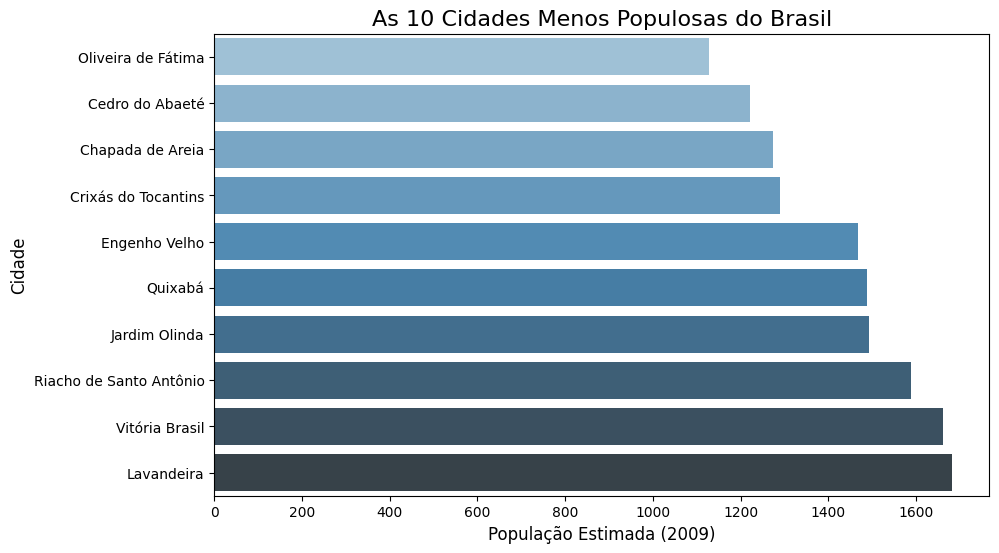

In [ ]:
# código para gerar a visualização - NÃO SEI FAZER SOZINHA

import matplotlib.pyplot as plt
import seaborn as sns

# Converter Pop_est_2009 para numérico, se necessário
brasil_df['Pop_est_2009'] = pd.to_numeric(brasil_df['Pop_est_2009'], errors='coerce')

# Selecionar as 10 cidades menos populosas
menos_populosas = brasil_df.sort_values(by='Pop_est_2009').head(10)

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Pop_est_2009', y='CIDADE', data=menos_populosas, palette='Blues_d')

# Adicionar título e labels
plt.title('As 10 Cidades Menos Populosas do Brasil', fontsize=16)
plt.xlabel('População Estimada (2009)', fontsize=12)
plt.ylabel('Cidade', fontsize=12)

# Exibir gráfico
plt.show()

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

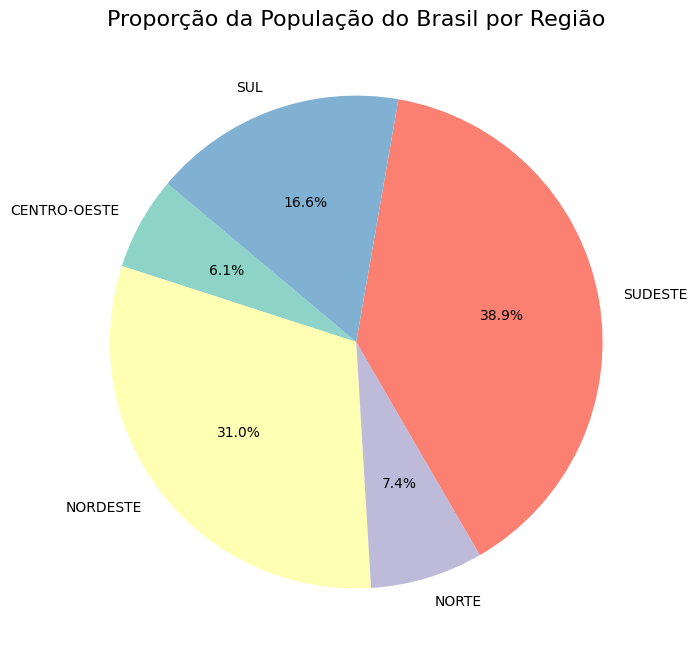

In [ ]:
# código para gerar a visualização - NÃO SEI FAZER SOZINHA

import matplotlib.pyplot as plt

# Agrupar por região e somar a população
populacao_por_regiao = brasil_df.groupby('REGIAO')['Pop_est_2009'].sum()

# Plotar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(populacao_por_regiao, labels=populacao_por_regiao.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(populacao_por_regiao)))

# Adicionar título
plt.title('Proporção da População do Brasil por Região', fontsize=16)

# Exibir gráfico
plt.show()